In [1]:
import numpy
from scipy.fft import fft
import math
import matplotlib.pyplot as pyplot

In [2]:
class Signal:
   
    def __init__(self, frequency=440, amp=1.0, offset=0.0):
        self.freq = frequency
        self.amp = amp
        self.offset = offset

    def period(self):
        return 1.0 / self.freq
    
    def copy(self, newfreq = None, newamp = None, newoffset = None):
        if newfreq == None:
            newfreq = self.freq
            
        if newamp == None:
            newamp = self.amp
            
        if newoffset == None:
            newoffset = self.offset
            
        return Signal(newfreq, newamp, newoffset)
    
    def evaluate(self, samplingFrequency):
        pass

In [3]:
class SineSignal(Signal):
    
    def evaluate(self, samplingFrequency):
        timesIterable = (1.0 / samplingFrequency * sample for sample in range(samplingFrequency))
        times = numpy.fromiter(timesIterable, float)
            
        valuesIterable = (self.amp * math.sin(2.0 * math.pi * self.freq * time + self.offset) for time in times)
        values = numpy.fromiter(valuesIterable, float)
            
        return values
        

In [4]:
class CosineSignal(Signal):
    
    def evaluate(self, samplingFrequency):
        timesIterable = (1.0 / samplingFrequency * sample for sample in range(samplingFrequency))
        times = numpy.fromiter(timesIterable, float)
            
        valuesIterable = (self.amp * math.cos(2.0 * math.pi * self.freq * time + self.offset) for time in times)
        values = numpy.fromiter(valuesIterable, float)
            
        return values

In [5]:
class SquareSignal(Signal):
    
    def evaluate(self, samplingFrequency):
        timesIterable = (1.0 / samplingFrequency * sample for sample in range(samplingFrequency))
        times = numpy.fromiter(timesIterable, float)
            
        valuesIterable = (numpy.sign(self.amp * math.cos(2.0 * math.pi * self.freq * time + self.offset)) for time in times)
        values = numpy.fromiter(valuesIterable, float)
            
        return values

In [6]:
class TriangleSignal(Signal):
    
    def evaluate(self, samplingFrequency):
        timesIterable = (1.0 / samplingFrequency * sample for sample in range(samplingFrequency))
        times = numpy.fromiter(timesIterable, float)
            
        valuesIterable = (2 * self.amp / math.pi * math.asin(math.sin(2 * math.pi * self.freq * time + self.offset)) for time in times)
        values = numpy.fromiter(valuesIterable, float)
            
        return values

In [7]:
class SawToothSignal(Signal):
    
    def evaluate(self, samplingFrequency):
        timesIterable = (1.0 / samplingFrequency * sample for sample in range(samplingFrequency))
        times = numpy.fromiter(timesIterable, float)
            
        valuesIterable = (- 2 * self.amp / math.pi * math.atan(1 / math.tan(self.freq * math.pi * (time + 1))) for time in times)
        values = numpy.fromiter(valuesIterable, float)
            
        return values

In [8]:
class Wave:
    
    def __init__(self, samplingFrequency=44100, magnification=1):
        self.samplingFrequency = samplingFrequency
        self.values = numpy.zeros(samplingFrequency)
        self.period = 1.0
        self.magnification = magnification
        iterable = ((1.0 * magnification) / samplingFrequency * sample for sample in range(samplingFrequency))
        self.times = numpy.fromiter(iterable, float)
        
    def sumSignal(self, signal):
        newValues = signal.evaluate(self.samplingFrequency)
        
        self.values = numpy.add(self.values, newValues)
        
    def plot_line(self):
        pyplot.title("Traced Wave Representation")
        pyplot.xlabel("t [s]")
        pyplot.ylabel("A")
        pyplot.ylim((-1, 1))
        pyplot.xlim((0, 1 / self.magnification))
        pyplot.plot(self.times / self.magnification, numpy.tile(self.values, self.period))
        
    def plot_dots(self):
        pyplot.title("Dotted Wave Representation")
        pyplot.xlabel("t [s]")
        pyplot.ylabel("A")
        pyplot.ylim((-1, 1))
        pyplot.scatter(self.times / self.magnification, numpy.tile(self.values, self.period))
        
    def plot_sampling_lines(self):
        self.plot_line()
        pyplot.title("Sampled Wave Lines Representation")
        pyplot.vlines(self.times / self.magnification, 0, numpy.tile(self.values, self.period), colors = "#FF0000")
        pyplot.hlines(0, 0, 1, linestyles = "dashdot", colors = "#000000")
        
    def getPlotPoints(self):
        return [self.times / self.magnification, numpy.tile(self.values, self.period)]

In [9]:
class Spectrum:
    
    def __init__(self, wave):
        self.wave = wave
        
    def plot(self, xlimit):
        precision = len(self.wave.values)
        ft = numpy.fft.fft(self.wave.values)
        freq = numpy.fft.fftfreq(precision)
        
        pyplot.title("FT Spectrum")
        pyplot.xlabel("Frequency [Hz]")
        pyplot.xlim((0, xlimit))
        pyplot.plot(freq * self.wave.samplingFrequency, abs(ft.real))
        pyplot.show()
        
    def log_plot(self, xlimit):
        precision = len(self.wave.values)
        ft = numpy.fft.fft(self.wave.values)
        freq = numpy.fft.fftfreq(precision)
        
        pyplot.title("FT Spectrum")
        pyplot.xlabel("Frequency [Hz]")
        pyplot.ylabel("ln(A)")
        pyplot.xlim((0, xlimit))
        pyplot.ylim((0, 10))
        pyplot.plot(freq * self.wave.samplingFrequency, numpy.log(abs(ft.real)))
        pyplot.show()

In [10]:
#cosine = CosineSignal(frequency = 5)
#sine = SineSignal(frequency = 5)
#square = SquareSignal(frequency = 5)
#triangle = TriangleSignal(frequency = 5)
#sawtooth = SawToothSignal(frequency = 5)

#offsetsine = SineSignal(frequency = 50, offset = math.pi/2)

#wave = Wave(samplingFrequency = 2000, magnification=100)
#wave.sumSignal(offsetsine)

#wave.plot_sampling_lines()

In [11]:
#spectrum = Spectrum(wave)
#spectrum.plot()

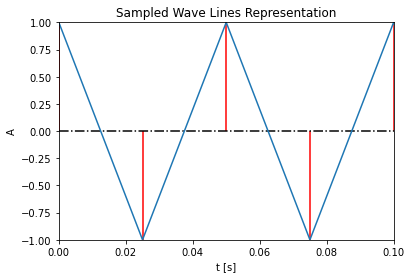

In [12]:
sine1 = SineSignal(frequency = 20, amp = 1, offset = math.pi/2)

wave1 = Wave(samplingFrequency = 40, magnification = 10)
wave1.sumSignal(sine1)

wave1.plot_sampling_lines()

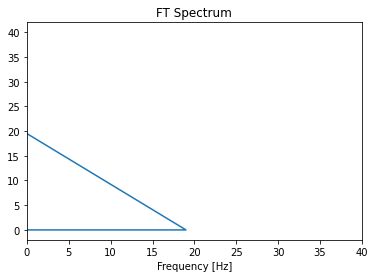

In [13]:
spectrum1 = Spectrum(wave1)
spectrum1.plot(40)

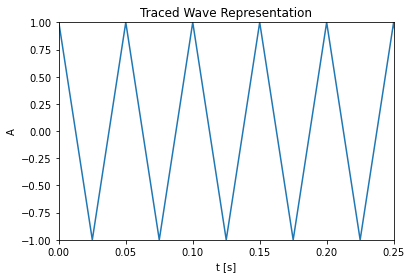

In [14]:
sawtooth1 = SineSignal(frequency = 20, amp = 1, offset = math.pi/2)
wave2 = Wave(samplingFrequency = 40, magnification = 4)
wave2.sumSignal(sawtooth1)

wave2.plot_line()

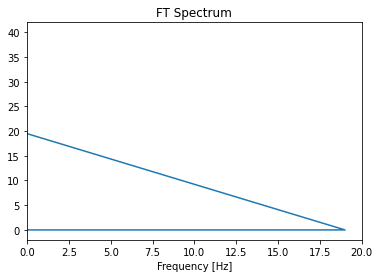

In [15]:
spectrum2 = Spectrum(wave2)
spectrum2.plot(20)

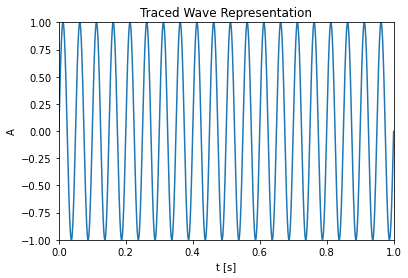

In [16]:
sinet5 = SineSignal(frequency = 5)
sinet10 = SineSignal(frequency = 10, offset = math.pi/2)
sinet15 = SineSignal(frequency = 15, offset = math.pi/4)
sinet20 = SineSignal(frequency = 20)

wave3 = Wave(samplingFrequency = 44100)
#wave3.sumSignal(sinet5)
#wave3.sumSignal(sinet10)
#wave3.sumSignal(sinet15)
wave3.sumSignal(sinet20)

wave3.plot_line()

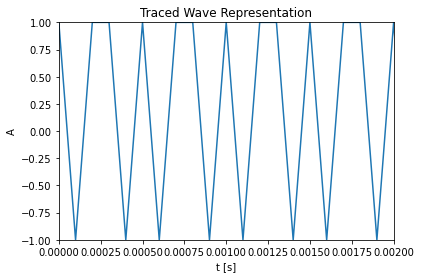

In [17]:
square = SquareSignal(frequency = 4000)
wave4 = Wave(samplingFrequency = 10000, magnification = 500)

wave4.sumSignal(square)
wave4.plot_line()

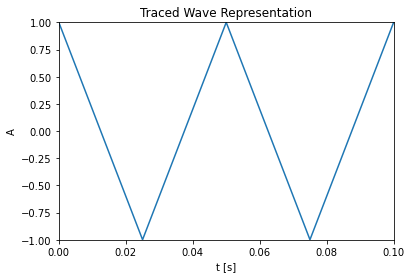

In [18]:
triangle = TriangleSignal(frequency = 20, amp = 1.0, offset = math.pi/2)
wave5 = Wave(samplingFrequency = 44100, magnification = 10)

wave5.sumSignal(triangle)
wave5.plot_line()

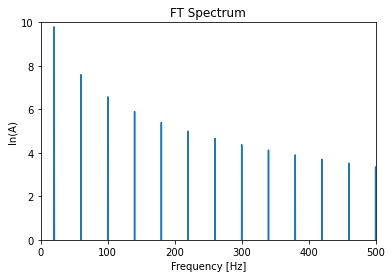

In [19]:
spectrumtriangle = Spectrum(wave5)
spectrumtriangle.log_plot(500)

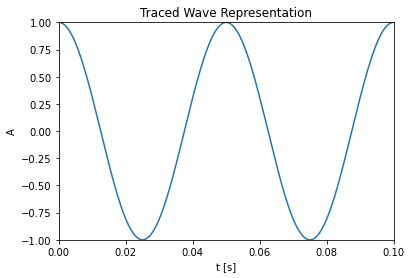

In [20]:
sine20 = SineSignal(frequency = 20, amp = 1.0, offset = math.pi/2)
wave20 = Wave(samplingFrequency = 44100, magnification = 10)
wave20.sumSignal(sine20)
wave20.plot_line()

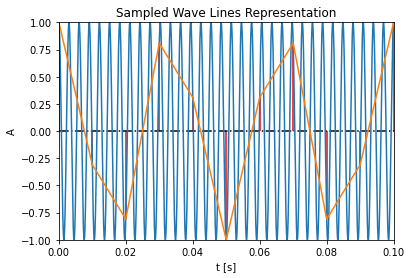

In [50]:
sine120 = SineSignal(frequency = 330, amp = 1.0, offset = math.pi/2)
wave100 = Wave(samplingFrequency = 100, magnification = 10)

wave44100 = Wave(samplingFrequency = 44100, magnification = 10)
wave44100.sumSignal(sine120)
wave44100.plot_line()

wave100.sumSignal(sine120)
wave100.plot_sampling_lines()

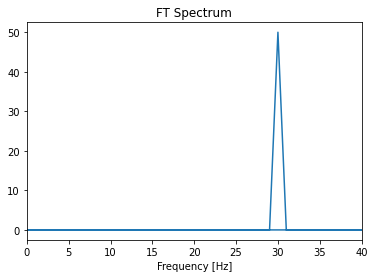

In [51]:
spectrum_aliased = Spectrum(wave100)
spectrum_aliased.plot(40)